# Dimensionality Reduction using an Autoencoder in Python

## Project Outline
[**Task 1**](#task1): Package Importing and Introduction to Project

[**Task 2**](#task2): Dataset Creation and Preprocessing

[**Task 3**](#task3): Create a Baseline Model with PCA

[**Task 4**](#task4): Autoencoder Introduction and Training

[**Task 5**](#task5): Reduction Dimensionality with AE

<a id='task1'></a>
### Task 1: Package Importing and Introduction

In [1]:
import matplotlib
%matplotlib inline
%config InLineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [3]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494',
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']        

<a id='task2'></a>
### Task 2: Dataset Creation and Preprocessing

In [4]:
X, y = make_blobs(n_features=50, centers=20, n_samples=250000,
                 cluster_std=0.2, center_box=[-1, 1], random_state=17)

In [5]:
X.shape

(250000, 50)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=17)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train.shape

(200000, 50)

In [8]:
X_test.shape

(50000, 50)

<a id='task3'></a>
### Task 3: Baseline Model with PCA

In [9]:
pca = PCA(n_components=2)
pca.fit(X_train)

res_pca = pca.transform(X_test)

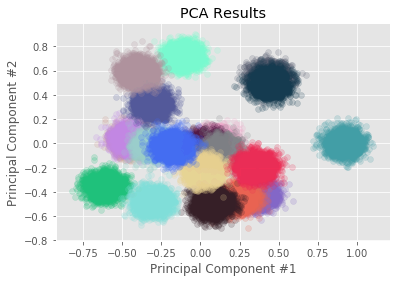

In [10]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    X_data = res_pca[y_test==unique_label]
    
    plt.scatter(X_data[:, 0], X_data[:, 1], alpha=0.2, c=cols[index])
    plt.xlabel('Principal Component #1')
    plt.ylabel('Principal Component #2')
    plt.title('PCA Results')

<a id='task4'></a>
### Task 4: Autoencoder Training

In [11]:
autoencoder = MLPRegressor(alpha=1e-15, 
                          hidden_layer_sizes=(90, 120, 150, 120, 90, 2, 90, 120, 150, 120, 90),
                          random_state=1, max_iter=20000)
autoencoder.fit(X_train, X_train)

MLPRegressor(alpha=1e-15,
             hidden_layer_sizes=(90, 120, 150, 120, 90, 2, 90, 120, 150, 120,
                                 90),
             max_iter=20000, random_state=1)

<a id='task5'></a>
### Task 5: Reducing Dimensionality with AE

In [12]:
weights = autoencoder.coefs_
biases = autoencoder.intercepts_

In [13]:
encoder_weights = weights[0:6]
encoder_biases = biases[0:6]

In [14]:
def encode(encoder_weights, encoder_biases, data):
    res_ae = data
    for layer, (w, b) in enumerate(zip(encoder_weights, encoder_biases)):
        if layer + 1 == len(encoder_weights):
            res_ae = res_ae@w+b
        else:
            res_ae = np.maximum(0, res_ae@w+b)
    return res_ae
    
res_ae = encode(encoder_weights, encoder_biases, X_test)

In [15]:
res_ae

array([[ 0.59932647, -0.34673048],
       [ 1.34090248, -0.28503126],
       [ 9.75211005, -0.47656066],
       ...,
       [ 1.07081602, -0.28729699],
       [ 0.44060608, -0.35472303],
       [ 0.33532807, -0.28721411]])

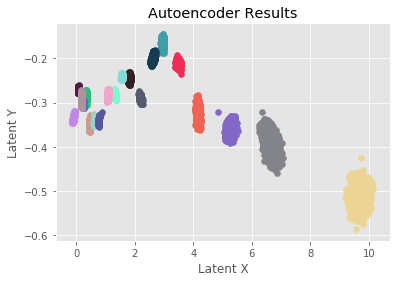

In [16]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test==unique_label]
    
    plt.scatter(latent_space[:, 0], latent_space[:, 1], c=cols[index])
    
    plt.xlabel('Latent X')
    plt.ylabel('Latent Y')
    plt.title('Autoencoder Results')

### Silhouette score
- Silhouette score is used to evaluate the quality of clusters created using clustering algorithms in terms of how well samples are clustered with other samples that are similar to each other. 
- The Silhouette score is calculated for each sample of different clusters.

In [17]:
silhouette_score(X_test, y_test)

0.6120635832174642

In [18]:
silhouette_score(res_pca, y_test)

0.32327460487799425

In [19]:
silhouette_score(res_ae, y_test)

0.9240996516575025